In [1]:
"""
Universidad Autónoma de Chihuahua
Facultad de Ingeniería
Maestría en Ingeniería en Computación
Machine Learning
Implementación con Random Forest/Decision Forest
Gael Aristides Hinojos Ramírez
384104
"""

'\nUniversidad Autónoma de Chihuahua\nFacultad de Ingeniería\nMaestría en Ingeniería en Computación\nMachine Learning\nImplementación con Random Forest/Decision Forest\nGael Aristides Hinojos Ramírez\n384104\n'

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import hashlib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [3]:
#Se lee el dataset y se describen las columnas con valores numericos
rain = pd.read_csv('weatherAUS.csv')
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
rain.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
#Se observa el numero de rows
len(rain)

145460

In [6]:
#Se trata de ver como son los valores de las direcciones del viento
rain['WindGustDir'].value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [7]:
#Se obtienen las areas incluidas en el dataset
print(rain['Location'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

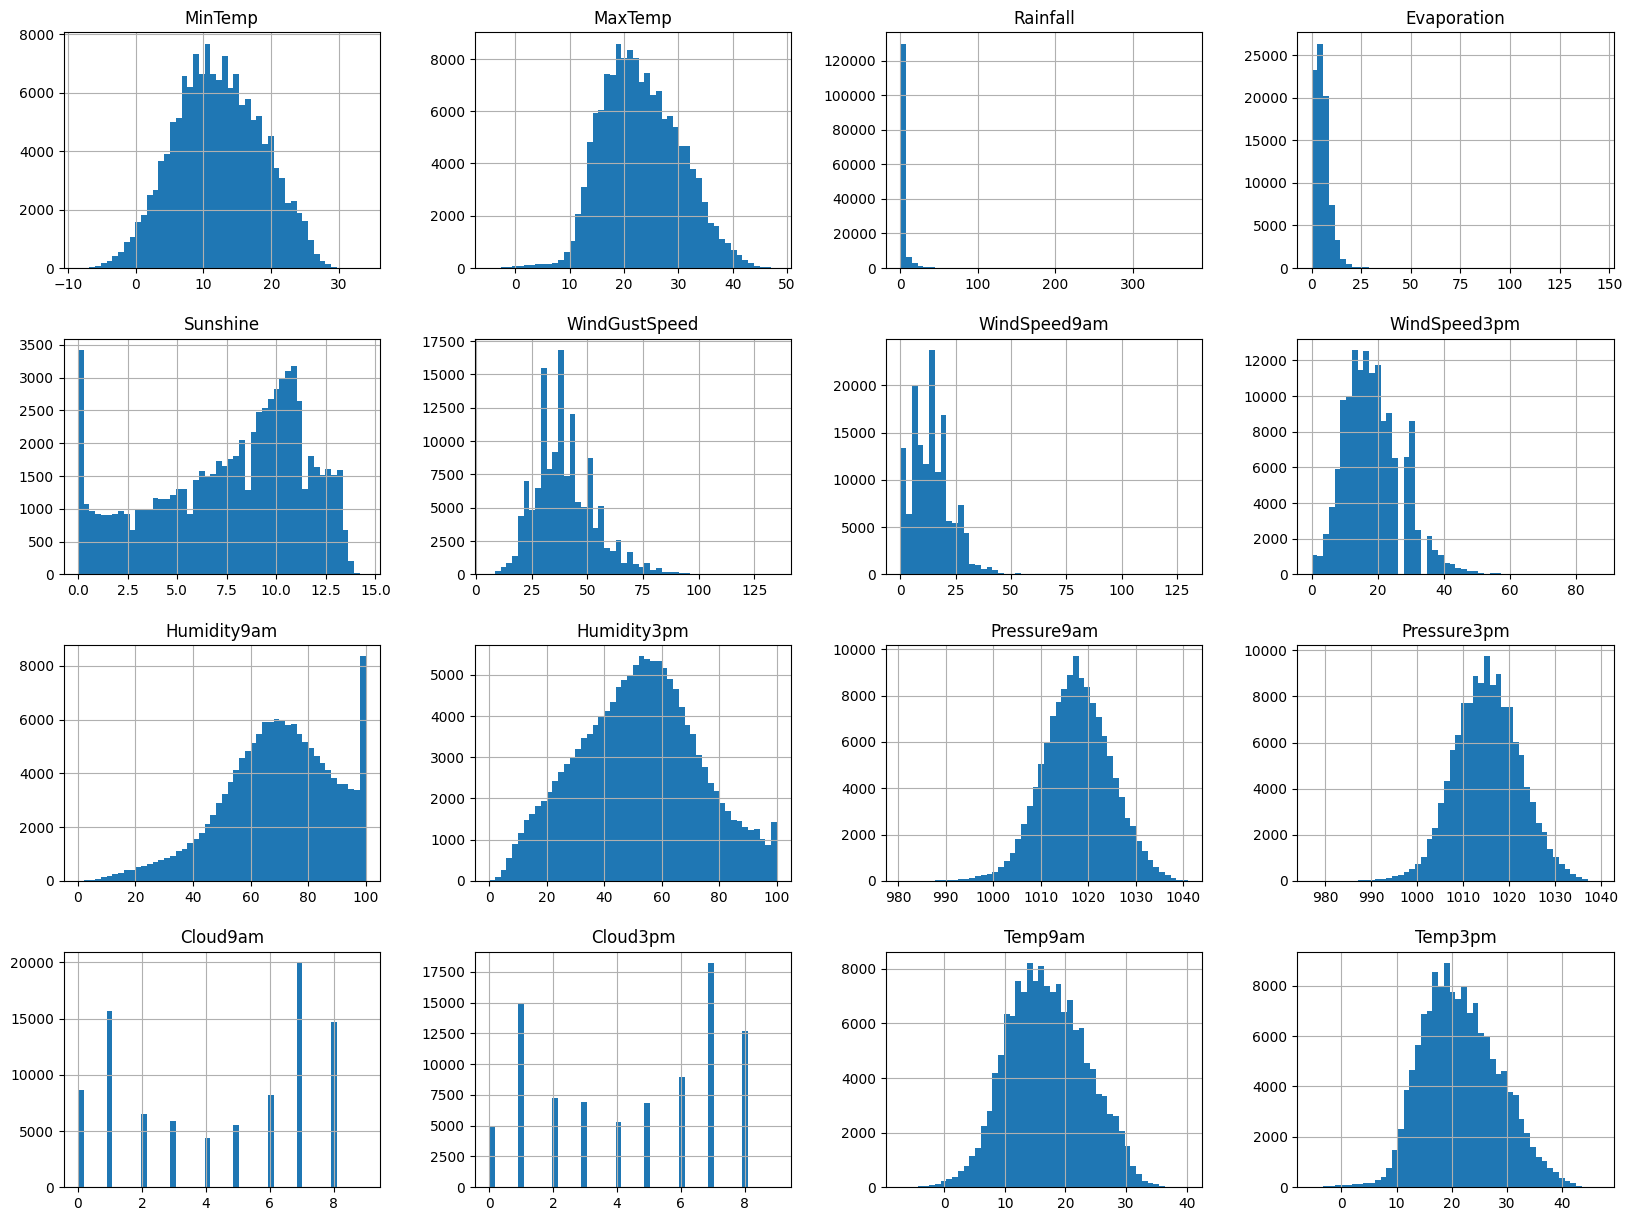

In [8]:
#Se realiza un histograma
rain.hist(bins=50, figsize=(20,15))

In [9]:
#Se separa la fecha en distintas columnas de día, mes y año
rain['Date'] = pd.to_datetime(rain['Date'])
rain['Day'] = rain['Date'].dt.day
rain['Month'] = rain['Date'].dt.month
rain['Year'] = rain['Date'].dt.year
rain.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [10]:
#Se eliminan las columnas que tienen muchos valores nulos; se elimina la columna de date; se eliminan los rows en donde la
#columna RainTomorrow o RainToday tiene valores vacios; se observan cuantos rows quedan despues de esto
"""rain = rain.drop('Evaporation', axis=1)
rain = rain.drop('Sunshine', axis=1)"""
rain = rain.drop('Cloud9am', axis=1)
rain = rain.drop('Cloud3pm', axis=1)
rain = rain.drop('Date', axis=1)
rain.dropna(subset='RainTomorrow', inplace=True)
rain.dropna(subset='RainToday', inplace=True)
len(rain)

140787

In [11]:
#Se cambian los valores de las columnas de RainTomorrow y RainToday por valores binarios 1 y 0
rain.loc[rain['RainTomorrow'] == 'No', 'RainTomorrow'] = 0.
rain.loc[rain['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1.
rain.loc[rain['RainToday'] == 'No', 'RainToday'] = 0.
rain.loc[rain['RainToday'] == 'Yes', 'RainToday'] = 1.

In [12]:
#Se crea una matriz de correlacion con todos los valores numericos
corr_dataframe = rain[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year']].copy()
corr_matrix = corr_dataframe.corr()
corr_matrix['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.447834
RainToday        0.313097
Humidity9am      0.257727
Rainfall         0.239032
WindGustSpeed    0.234285
WindSpeed9am     0.089803
WindSpeed3pm     0.086762
MinTemp          0.084322
Month            0.007192
Day              0.005183
Year            -0.013074
Temp9am         -0.025447
MaxTemp         -0.159405
Temp3pm         -0.192747
Pressure3pm     -0.228192
Pressure9am     -0.248253
Name: RainTomorrow, dtype: float64

In [13]:
#Se convierten de nuevo las etiquetas en valores tipo String
rain.loc[rain['RainTomorrow'] == 0., 'RainTomorrow'] = 'No'
rain.loc[rain['RainTomorrow'] == 1., 'RainTomorrow'] = 'Yes'

In [14]:
#Se realiza la particion del dataset
X_train, X_test, y_train, y_test = train_test_split(rain, rain['RainTomorrow'], random_state=12, test_size=0.25)
print(X_train.shape)

(105590, 23)


In [15]:
#Se crea un Imputador que calcula la media por Localidad
class MeanByLocation(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        self.dict_mean = {}
        super().__init__()
        self.new_X = []
    def mean_filler(self, row):
        values_fill = self.dict_mean[row['Location']]
        row['MinTemp'] = (values_fill['MinTemp'] if pd.isna(row['MinTemp']) else row['MinTemp'])
        row['MaxTemp']  = (values_fill['MaxTemp'] if pd.isna(row['MaxTemp']) else row['MaxTemp'])
        row['Rainfall']  = (values_fill['Rainfall'] if pd.isna(row['Rainfall']) else row['Rainfall'])
        row['Evaporation']  = (values_fill['Evaporation'] if pd.isna(row['Evaporation']) else row['Evaporation'])
        row['Sunshine'] = (values_fill['Sunshine'] if pd.isna(row['Sunshine']) else row['Sunshine'])
        row['WindGustSpeed'] = (values_fill['WindGustSpeed'] if pd.isna(row['WindGustSpeed']) else row['WindGustSpeed'])
        row['WindSpeed9am'] = (values_fill['WindSpeed9am'] if pd.isna(row['WindSpeed9am']) else row['WindSpeed9am'])
        row['WindSpeed3pm'] = (values_fill['WindSpeed3pm'] if pd.isna(row['WindSpeed3pm']) else row['WindSpeed3pm'])
        row['Humidity9am'] = (values_fill['Humidity9am'] if pd.isna(row['Humidity9am']) else row['Humidity9am'])
        row['Humidity3pm'] = (values_fill['Humidity3pm'] if pd.isna(row['Humidity3pm']) else row['Humidity3pm'])
        row['Pressure9am'] = (values_fill['Pressure9am'] if pd.isna(row['Pressure9am']) else row['Pressure9am'])
        row['Pressure3pm'] = (values_fill['Pressure3pm'] if pd.isna(row['Pressure3pm']) else row['Pressure3pm'])
        row['Temp9am'] = (values_fill['Temp9am'] if pd.isna(row['Temp9am']) else row['Temp9am'])
        row['Temp3pm'] = (values_fill['Temp3pm'] if pd.isna(row['Temp3pm']) else row['Temp3pm'])
        return row
    def fit(self, X, y=None):
        self.new_X = X.copy()
        self.dict_mean =  self.new_X.groupby('Location').mean().to_dict('index')
        return self
    def transform(self, X):
        new_X = self.new_X.apply(self.mean_filler, axis=1)
        return new_X

In [16]:
#Se crea un Imputador que convierte las columnas de tipo String a valores hash
class StringHasher(BaseEstimator, TransformerMixin):
    def hashString(self, s):
        s = str(s)
        return int(hashlib.sha256(s.encode('utf-8')).hexdigest(), 16) % 10**4
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        new_X = X.copy()
        new_X['Location'] = new_X['Location'].apply(self.hashString)
        new_X['WindDir3pm'] = new_X['WindDir3pm'].apply(self.hashString)
        new_X['WindDir9am'] = new_X['WindDir9am'].apply(self.hashString)
        new_X['WindGustDir'] = new_X['WindGustDir'].apply(self.hashString)
        return new_X

In [17]:
#Se crea un pipeline que no normaliza los datos
less_pipeline = Pipeline([
    ('hasher', StringHasher()),
    ('mean_by_location', MeanByLocation()),
    ('imputer', SimpleImputer(strategy='mean'))
])
less_rain = less_pipeline.fit_transform(X_train.drop('RainTomorrow', axis=1))

In [18]:
#Se crea un grid para realizar una búsqueda de parámetros para el modelo de Decision Tree
tree_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'class_weight': [None, 'balanced']
}

In [19]:
#Se crea un grid para realizar una búsqueda de parámetros para el modelo de Random Forest
forest_grid = {
    'n_estimators': [100, 120, 150, 175], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [None, 3, 4, 5, 6],
    'max_features': ['srqt', 'log2', None], 'bootstrap': [True, False], 'oob_score': [True], 'warm_start': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

In [20]:
# Se realiza un grid search con el modelo de Decision Tree y los datos no normalizados
less_tree_gs = GridSearchCV(DecisionTreeClassifier(), tree_grid, cv=5)
less_tree_gs.fit(less_rain, y_train)

print('Best Parameters: ', less_tree_gs.best_params_)
print('Best Estimator: ', less_tree_gs.best_estimator_)
print('Best Score: ', less_tree_gs.best_score_)

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'log_loss', 'splitter': 'best'}
Best Estimator:  DecisionTreeClassifier(class_weight='balanced', criterion='log_loss')
Best Score:  0.7917700539823846


In [27]:
# Se realiza un grid search con el modelo de Random Forest y los datos no normalizados
less_forest_rs = GridSearchCV(RandomForestClassifier(), forest_grid, cv=5)
less_forest_rs.fit(less_rain, y_train)

print('Best Parameters: ', less_forest_rs.best_params_)
print('Best Estimator: ', less_forest_rs.best_estimator_)
print('Best Score: ', less_forest_rs.best_score_)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the c

Best Parameters:  {'bootstrap': True, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 175, 'oob_score': True, 'warm_start': False}
Best Estimator:  RandomForestClassifier(criterion='log_loss', max_features='log2',
                       n_estimators=175, oob_score=True)
Best Score:  0.8584903873472868


In [28]:
#Se crea un pipeline con normalizacion de datos y se transforman los datos
more_pipeline = Pipeline([
    ('hasher', StringHasher()),
    ('mean_by_location', MeanByLocation()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('min_max_scaler', MinMaxScaler(feature_range=(0, 1)))
])

more_rain = more_pipeline.fit_transform(X_train.drop('RainTomorrow', axis=1))

In [29]:
#Se realiza un grid search para el modelo de Decision Tree con datos normalizados
more_tree_gs = GridSearchCV(DecisionTreeClassifier(), tree_grid, cv=5)
more_tree_gs.fit(more_rain, y_train)

print('Best Parameters: ', more_tree_gs.best_params_)
print('Best Estimator: ', more_tree_gs.best_estimator_)
print('Best Score: ', more_tree_gs.best_score_)

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'log_loss', 'splitter': 'best'}
Best Estimator:  DecisionTreeClassifier(class_weight='balanced', criterion='log_loss')
Best Score:  0.7928970546453262


In [30]:
#Se realiza un grid search para el modelo de Random Forest con datos normalizados
more_forest_rs = GridSearchCV(RandomForestClassifier(), forest_grid, cv=5)
more_forest_rs.fit(more_rain, y_train)

print('Best Parameters: ', more_forest_rs.best_params_)
print('Best Estimator: ', more_forest_rs.best_estimator_)
print('Best Score: ', more_forest_rs.best_score_)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the c

Best Parameters:  {'bootstrap': True, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 175, 'oob_score': True, 'warm_start': False}
Best Estimator:  RandomForestClassifier(criterion='log_loss', max_features='log2',
                       n_estimators=175, oob_score=True)
Best Score:  0.858300975471162


In [31]:
#transformar la partición de test con y sin normalización
less_test = less_pipeline.transform(X_test.drop('RainTomorrow', axis=1))
more_test = more_pipeline.transform(X_test.drop('RainTomorrow', axis=1))

              precision    recall  f1-score   support

         Yes       0.86      0.86      0.86     27377
          No       0.52      0.53      0.52      7820

    accuracy                           0.79     35197
   macro avg       0.69      0.69      0.69     35197
weighted avg       0.79      0.79      0.79     35197

Accuracy:  0.7860044890189505
Area Under the Curve:   0.6940351319788195


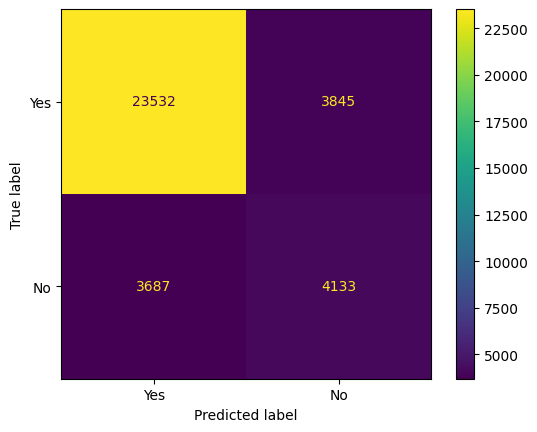

In [33]:
#Se realizan las predicciones con los datos no normalizados y el modelo de Decision Tree. Se sacan métricas.
less_tree_model = less_tree_gs.best_estimator_
less_tree_pred = less_tree_model.predict(less_test)

print(classification_report(y_test, less_tree_pred, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, less_tree_pred))
print('Area Under the Curve:  ', roc_auc_score(y_test, less_tree_model.predict_proba(less_test)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, less_tree_pred, display_labels=['Yes', 'No'])
disp

              precision    recall  f1-score   support

         Yes       0.87      0.95      0.91     27377
          No       0.76      0.52      0.62      7820

    accuracy                           0.86     35197
   macro avg       0.82      0.74      0.77     35197
weighted avg       0.85      0.86      0.85     35197

Accuracy:  0.8575162655908174
Area Under the Curve:   0.8895579666393475


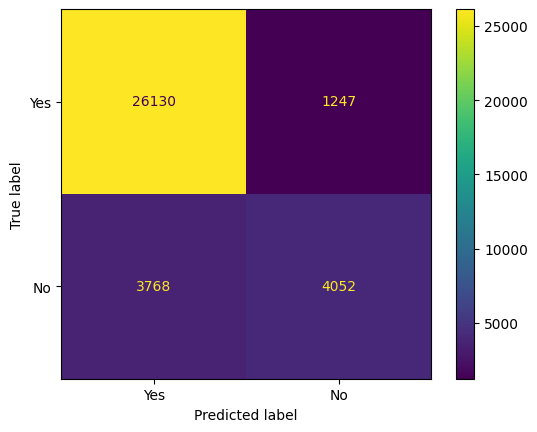

In [34]:
#Se realizan las predicciones con los datos no normalizados y el modelo de Random Forest. Se sacan métricas.
less_forest_model = less_forest_rs.best_estimator_
less_forest_pred = less_forest_model.predict(less_test)

print(classification_report(y_test, less_forest_pred, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, less_forest_pred))
print('Area Under the Curve:  ', roc_auc_score(y_test, less_forest_model.predict_proba(less_test)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, less_forest_pred, display_labels=['Yes', 'No'])
disp

              precision    recall  f1-score   support

         Yes       0.87      0.86      0.86     27377
          No       0.52      0.53      0.53      7820

    accuracy                           0.79     35197
   macro avg       0.69      0.70      0.70     35197
weighted avg       0.79      0.79      0.79     35197

Accuracy:  0.7872830070744665
Area Under the Curve:   0.6967753444912923


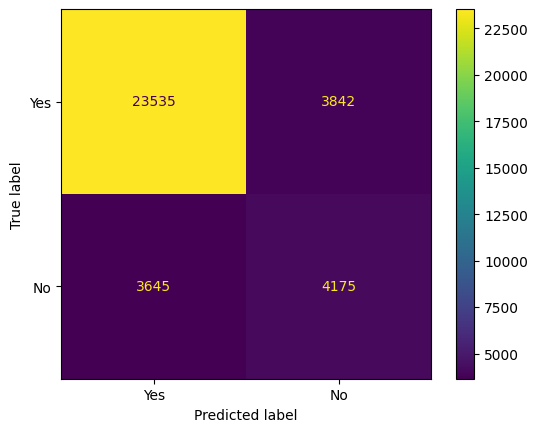

In [35]:
#Se realizan las predicciones con los datos normalizados y el modelo de Decision Tree. Se calculan métricas.
more_tree_model = more_tree_gs.best_estimator_
more_tree_pred = more_tree_model.predict(more_test)

print(classification_report(y_test, more_tree_pred, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, more_tree_pred))
print('Area Under the Curve:  ', roc_auc_score(y_test, more_tree_model.predict_proba(more_test)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, more_tree_pred, display_labels=['Yes', 'No'])
disp

              precision    recall  f1-score   support

         Yes       0.87      0.95      0.91     27377
          No       0.76      0.52      0.62      7820

    accuracy                           0.86     35197
   macro avg       0.82      0.74      0.77     35197
weighted avg       0.85      0.86      0.85     35197

Accuracy:  0.8581413188624031
Area Under the Curve:   0.889859870331911


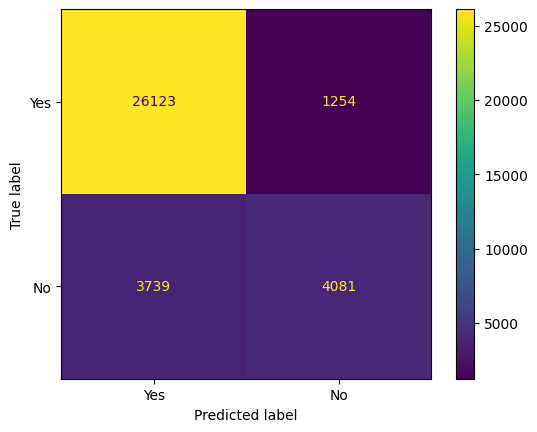

In [36]:
#Se realizan las predicciones con los datos normalizados y el modelo de Random Forest. Se calculan métricas.
more_forest_model = more_forest_rs.best_estimator_
more_forest_pred = more_forest_model.predict(more_test)

print(classification_report(y_test, more_forest_pred, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, more_forest_pred))
print('Area Under the Curve:  ', roc_auc_score(y_test, more_forest_model.predict_proba(more_test)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, more_forest_pred, display_labels=['Yes', 'No'])
disp

In [42]:
#Se utiliza la técnica SMOTE con los datos normalizados para conocer el cambio en el rendimiento de los modelos.
smote = SMOTE(random_state=12)
smote_rain, y_rain = smote.fit_resample(more_rain, y_train)
print(smote_rain.shape)

(164418, 22)


In [43]:
#Se realiza un grid search con el modelo de Decision Tree.
smote_tree_gs = GridSearchCV(DecisionTreeClassifier(), tree_grid, cv=5)
smote_tree_gs.fit(smote_rain, y_rain)

print('Best Parameters: ', smote_tree_gs.best_params_)
print('Best Estimator: ', smote_tree_gs.best_estimator_)
print('Best Score: ', smote_tree_gs.best_score_)

Best Parameters:  {'class_weight': None, 'criterion': 'entropy', 'splitter': 'best'}
Best Estimator:  DecisionTreeClassifier(criterion='entropy')
Best Score:  0.8224833644120686


In [44]:
#Se realiza un randomized search con el modelo de Random Forest.
smote_forest_rs = RandomizedSearchCV(RandomForestClassifier(), forest_grid, cv=5)
smote_forest_rs.fit(smote_rain, y_rain)

print('Best Parameters: ', smote_forest_rs.best_params_)
print('Best Estimator: ', smote_forest_rs.best_estimator_)
print('Best Score: ', smote_forest_rs.best_score_)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the c

Best Parameters:  {'warm_start': True, 'oob_score': True, 'n_estimators': 150, 'max_features': None, 'max_depth': None, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}
Best Estimator:  RandomForestClassifier(max_features=None, n_estimators=150, oob_score=True,
                       warm_start=True)
Best Score:  0.8894407415722723


              precision    recall  f1-score   support

         Yes       0.87      0.81      0.84     27377
          No       0.47      0.59      0.53      7820

    accuracy                           0.76     35197
   macro avg       0.67      0.70      0.68     35197
weighted avg       0.79      0.76      0.77     35197

Accuracy:  0.763530982754212
Area Under the Curve:   0.7021978798078212


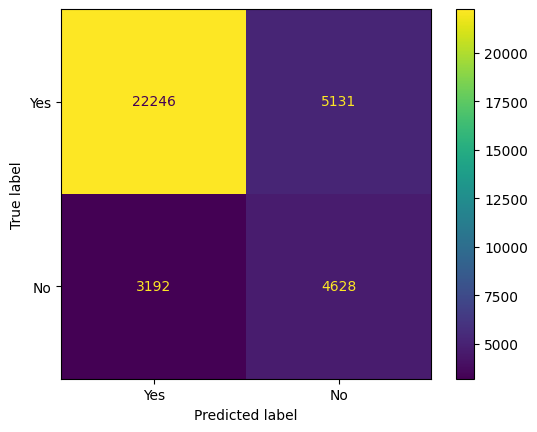

In [45]:
#Se realizan las predicciones con el modelo de Decision Tree y se calculan métricas.
smote_tree_model = smote_tree_gs.best_estimator_
smote_tree_pred = smote_tree_model.predict(more_test)

print(classification_report(y_test, smote_tree_pred, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, smote_tree_pred))
print('Area Under the Curve:  ', roc_auc_score(y_test, smote_tree_model.predict_proba(more_test)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, smote_tree_pred, display_labels=['Yes', 'No'])
disp

              precision    recall  f1-score   support

         Yes       0.90      0.89      0.90     27377
          No       0.64      0.64      0.64      7820

    accuracy                           0.84     35197
   macro avg       0.77      0.77      0.77     35197
weighted avg       0.84      0.84      0.84     35197

Accuracy:  0.8389635480296617
Area Under the Curve:   0.8740921869842952


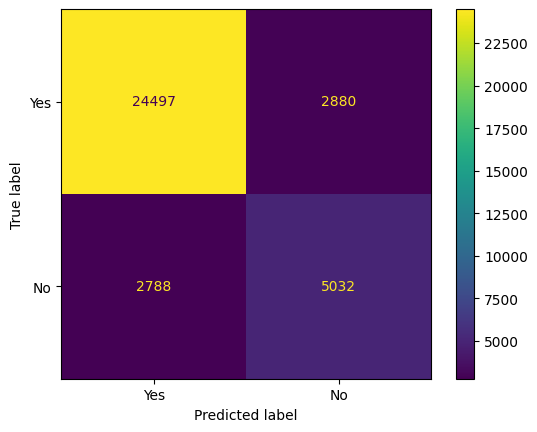

In [46]:
#Se realizan las predicciones con el modelo de Decision Tree y se calculan métricas.
smote_forest_model = smote_forest_rs.best_estimator_
smote_forest_pred = smote_forest_model.predict(more_test)

print(classification_report(y_test, smote_forest_pred, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, smote_forest_pred))
print('Area Under the Curve:  ', roc_auc_score(y_test, smote_forest_model.predict_proba(more_test)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, smote_forest_pred, display_labels=['Yes', 'No'])
disp